In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer1 = nn.Linear(2, 2) 
        self.hidden_layer2 = nn.Linear(2, 2)  
        self.output_layer = nn.Linear(2, 2)   
        self.activation = nn.ReLU()  
        self._initialize_weights()
    
    def _initialize_weights(self):
        with torch.no_grad():
            self.hidden_layer1.weight.copy_(torch.tensor([[0.15, 0.20], [0.25, 0.30]]))
            self.hidden_layer1.bias.copy_(torch.tensor([0.35, 0.35]))
            self.hidden_layer2.weight.copy_(torch.tensor([[0.40, 0.45], [0.50, 0.55]]))
            self.hidden_layer2.bias.copy_(torch.tensor([0.60, 0.60]))
            self.output_layer.weight.copy_(torch.tensor([[0.593269992, 0.75136507], [0.596884378, 0.772928465]]))
            self.output_layer.bias.copy_(torch.tensor([0.35, 0.60]))
    
    def forward(self, x):
        x = self.activation(self.hidden_layer1(x))
        x = self.activation(self.hidden_layer2(x))
        x = torch.sigmoid(self.output_layer(x)) 
        return x



In [ ]:
model = CustomModel().to(device)

In [8]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.4)

In [9]:
input_tensor = torch.tensor([0.05, 0.10], device=device) 
target = torch.tensor([0.99, 0.01], device=device)  
losses = []

for epoch in range(100):  
    optimizer.zero_grad() 
    output = model(input_tensor)
    loss = criterion(output, target)  
    loss.backward()  
    optimizer.step()  
    losses.append(loss.item()) 

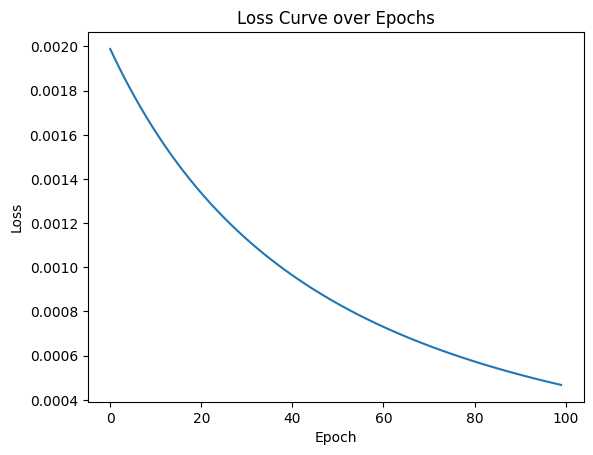

In [10]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve over Epochs")
plt.show()

In [11]:
print("Final Weights and Biases:")
for name, param in model.named_parameters():
    print(name, param.data)

Final Weights and Biases:
hidden_layer1.weight tensor([[0.1599, 0.2198],
        [0.2610, 0.3221]], device='cuda:0')
hidden_layer1.bias tensor([0.5484, 0.5706], device='cuda:0')
hidden_layer2.weight tensor([[0.5437, 0.6002],
        [0.5488, 0.6028]], device='cuda:0')
hidden_layer2.bias tensor([0.9640, 0.6614], device='cuda:0')
output_layer.weight tensor([[ 0.9368,  1.0540],
        [-0.8495, -0.5137]], device='cuda:0')
output_layer.bias tensor([ 0.7595, -1.1583], device='cuda:0')
